# VCHE Benchmark Analysis and Graphs For FL -- 1000 runs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
#Nov 26th commit c0f814662d3aae232da28f868cc069aed8b1484e
# averaged 1000 runs -- CLUSTER

# REMOVING PRE_VERIF and adding it in Ecd
fl_bench={'Type':"baseline",'PN':15, 'LogT': 55, 'Lbd': 0,  'Ecd': 2.41932845E+08,                  'Enc': 4.095756810E+09,  'Eval': 1.66417180E+08,  'Verif': 0          ,    'Dec':1.65624431E+08, 'Dcd': 4.8670518E+07}
fl_V1   ={'Type':"REP "    ,'PN':15, 'LogT': 55, 'Lbd': 64, 'Ecd': 9.0033436510E+10,                'Enc': 1.64695250598E+11,'Eval': 1.3333472909E+10,'Verif': 1.190508211E+09,'Dec':8.747757620E+09,'Dcd': 5.466195062E+09}
fl_V1PRF={'Type':"REP+"   , 'PN':15, 'LogT': 55, 'Lbd': 64, 'Ecd': 4.16499592022E+11+4.29971043E+08,'Enc': 1.83570709447E+11,'Eval': 1.4668584248E+10,'Verif': 7.15833002E+08 ,'Dec':8.677204815E+09,'Dcd': 5.494690098E+09}
fl_V2   ={'Type':"PE  "   , 'PN':15, 'LogT': 55, 'Lbd': 54, 'Ecd': 5.314053978E+09,                 'Enc': 5.920929520E+09,  'Eval': 4.14354387E+08 , 'Verif': 3.534844E+06,   'Dec':3.93156718E+08, 'Dcd': 2.83191198E+08}
timings={'Bench':fl_bench, 'REP':fl_V1, 'RE+':fl_V1PRF, 'PE':fl_V2}

In [3]:
pd.DataFrame(createDFDiffR(timings))

,,Ecd,Enc,Eval,Dec,Verif,Dcd
Create,REP,20.700306,37.024201,0.000000,0.000000,0.000000,0.000000
Eval.,REP,0.000000,0.000000,79.120772,0.000000,0.000000,0.000000
Verify,REP,0.000000,0.000000,0.000000,40.048229,5.555466,25.280692
Create,RE+,96.062112,41.375702,0.000000,0.000000,0.000000,0.000000
Verify,RE+,0.000000,0.000000,0.000000,39.718997,3.340410,25.413663
Create,PE,1.169314,0.420771,0.000000,0.000000,0.000000,0.000000
Eval.,PE,0.000000,0.000000,1.489853,0.000000,0.000000,0.000000
Verify,PE,0.000000,0.000000,0.000000,1.061772,0.016495,1.094383


In [4]:
pd.DataFrame(timings)

,Bench,REP,RE+,PE
Type,baseline,REP,REP+,PE
PN,15,15,15,15
LogT,55,55,55,55
Lbd,0,64,64,54
Ecd,241932845.0,90033436510.0,416929563065.0,5314053978.0
Enc,4095756810.0,164695250598.0,183570709447.0,5920929520.0
Eval,166417180.0,13333472909.0,14668584248.0,414354387.0
Verif,0,1190508211.0,715833002.0,3534844.0
Dec,165624431.0,8747757620.0,8677204815.0,393156718.0
Dcd,48670518.0,5466195062.0,5494690098.0,283191198.0


In [5]:
sns.set(font_scale=3)
#color = sns.color_palette("deep", 10) #["green", "Black", "Red", "Yellow", "peru", "Grey", "aqua"]
sns.set_palette(sns.cubehelix_palette(n_colors=7, start=0.8,rot=3,hue=1,gamma=1,dark=0.25,light=0.75))
sns.set_style("dark", {
   'axes.grid': True,
   'axes.edgecolor': 'none'
})
plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath' #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here


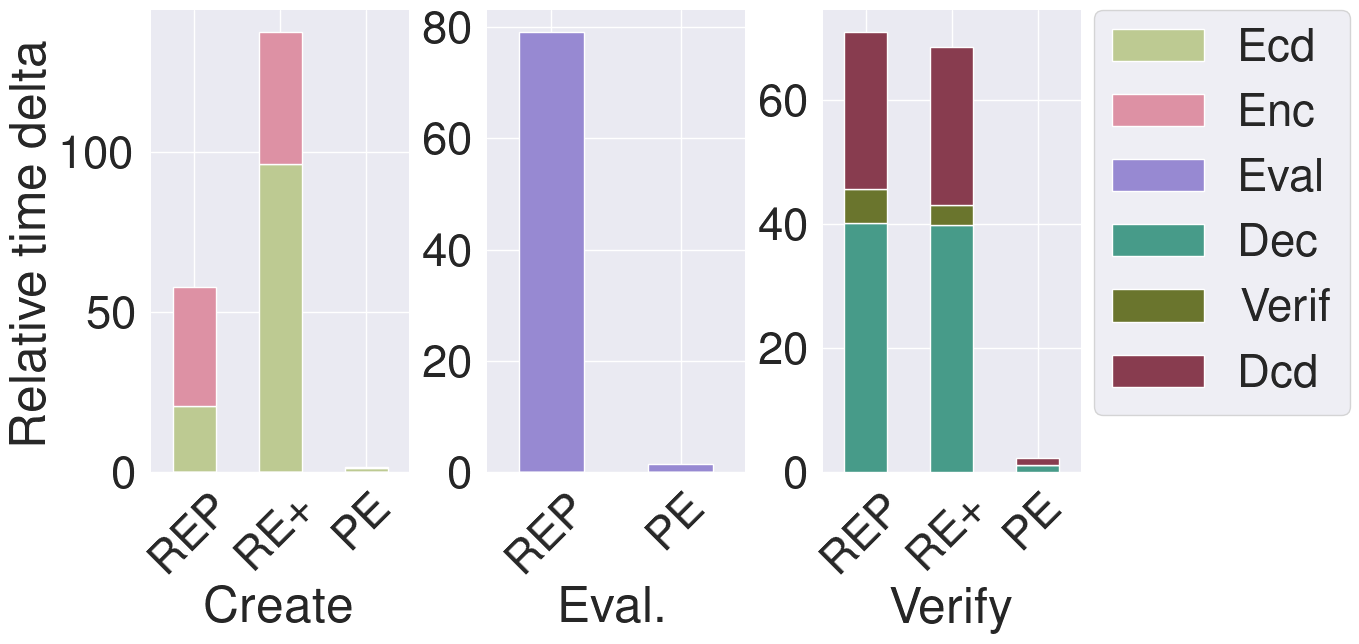

In [6]:
# Plot the barplot RelativeDIFFERENCE with the baseline
timings_df = pd.DataFrame(createDFDiffR(timings))

n_subplots = len(timings_df.index.levels[0])
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=False, figsize=(12, 6))  # width, height
axes[0].set_ylabel('Relative time delta')

graph = dict(zip(timings_df.index.levels[0], axes[-n_subplots:]))
plots = list(map(lambda x: plot_function(x, graph[x], timings_df), graph))
fig.subplots_adjust(wspace=0.3)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Figures/barplotFL1000.pdf', bbox_inches='tight')
plt.show()